# MoDISco on Neural-like

Running MoDISco on neural-like state on transient peak set.

In [1]:
import modisco
import h5py
import intervaltree
import h5py
from collections import defaultdict, OrderedDict

In [2]:
!pip freeze | grep modisco

modisco @ https://github.com/kundajelab/tfmodisco/archive/v0.5.14.0-devfixed.tar.gz


In [3]:
HDF5_PATH = "/users/surag/oak/projects/scATAC-reprog/clusters/20201020_n62402/interpretation/20201105_all_peaks_filt256_in2346_out2000/cluster_idx16/counts_scores.h5"
REG_PATH = "/users/surag/oak/projects/scATAC-reprog/clusters/20201020_n62402/interpretation/20201105_all_peaks_filt256_in2346_out2000/cluster_idx16/regions.bed"

In [4]:
# will crop to this region around center (summit of peak)
CROP = 500

In [5]:
scores = h5py.File(HDF5_PATH, 'r')

In [6]:
# scores.close()

In [7]:
with open(REG_PATH) as f:
    scores_regions = [x.strip().split('\t') for x in f]

# importance scores are computed centered at summit (2nd col + 10th col)
scores_regions = [(x[0], int(x[9])+int(x[1])-CROP//2, int(x[9])+int(x[1])+CROP//2) for x in scores_regions]

In [8]:
# PEAK_SET = "../20200307_fine_clustering/beds/20201211_gridmap_peakwidthnorm_logplusznorm_4way_ordered_n20/idx13.bed"
PEAK_SET = "./peak_sets/open_stay.200.bed"

In [9]:
peak_set_intervals = defaultdict(intervaltree.IntervalTree)

with open(PEAK_SET) as f:
    for i,x in enumerate(f):
        x = x.strip().split('\t')
        peak_set_intervals[x[0]][int(x[1]):int(x[2])] = i

In [10]:
# find scored regions intersecting with peak set

intersecting_idx = [i for i,x in enumerate(scores_regions) if peak_set_intervals[x[0]][x[1]:x[2]]]

print(sum([len(peak_set_intervals[x]) for x in peak_set_intervals]))
print(len(intersecting_idx))
print(len(scores_regions))

8304
5451
158577


In [11]:
# hdf5_results = h5py.File("results_cluster_idx14_peak_set_idx8.hdf5","r")
hdf5_results = h5py.File("results_cluster_idx4_peak_set_open_neural_iPSC.hdf5","r")

In [12]:
[scores_regions[i] for i in intersecting_idx][5021]

('chr12', 87107231, 87107731)

In [58]:
# hdf5_results['metacluster_idx_to_submetacluster_results']['metacluster_0']['seqlets_to_patterns_result']['patterns']['pattern_0']['seqlets_and_alnmts']['seqlets'][:10]
hdf5_results['metacluster_idx_to_submetacluster_results']['metacluster_1']['seqlets_to_patterns_result']['patterns']['pattern_0']['seqlets_and_alnmts']['seqlets'][:10]

array([b'example:2485,start:232,end:282,rc:False',
       b'example:5021,start:311,end:361,rc:True',
       b'example:2946,start:184,end:234,rc:True',
       b'example:74,start:223,end:273,rc:False',
       b'example:4309,start:240,end:290,rc:True',
       b'example:4733,start:155,end:205,rc:True',
       b'example:1151,start:238,end:288,rc:False',
       b'example:2226,start:133,end:183,rc:False',
       b'example:779,start:290,end:340,rc:False',
       b'example:2249,start:187,end:237,rc:False'], dtype=object)

In [13]:
hdf5_results.close()

In [11]:
shap_scores_seq = []
proj_shap_scores_seq = []
one_hot_seqs = []

center = int(scores['shap']['seq'].shape[-1]/2)
start = center - CROP//2
end = center + CROP//2

for i in scores['shap']['seq'][intersecting_idx]:
    shap_scores_seq.append(i[:,start:end].transpose())

for i in scores['projected_shap']['seq'][intersecting_idx]:
    proj_shap_scores_seq.append(i[:,start:end].transpose())

for i in scores['raw']['seq'][intersecting_idx]:
    one_hot_seqs.append(i[:,start:end].transpose())

tasks = ['task0']
task_to_scores = OrderedDict()
task_to_hyp_scores = OrderedDict()

onehot_data = one_hot_seqs
task_to_scores['task0']  = proj_shap_scores_seq
task_to_hyp_scores['task0']  = shap_scores_seq

In [12]:
import modisco

# from modisco.visualization import viz_sequence

TF-MoDISco is using the TensorFlow backend.
/users/surag/anaconda3/envs/mtbatchgen/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/surag/anaconda3/envs/mtbatchgen/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/surag/anaconda3/envs/mtbatchgen/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

Instructions for updating:
non-resource variables are not supported in the long term
MEMORY 1.659674624
On task task0
Computing windowed sums on original
Generating null dist
peak(mu)= -0.0003691243791558276
Computing threshold
Subsampling!
For increasing = True , the minimum IR precision was 0.2825829196928917 occurring at 1.1026240827327616e-07 implying a frac_neg of 0.3938893113221182
To be conservative, adjusted frac neg is 0.95
For increasing = False , the minimum IR precision was 0.005107543069233759 occurring at -1.400681867384096e-07 implying a frac_neg of 0.005133763989919556
To be conservative, adjusted frac neg is 0.95
Thresholds from null dist were -0.14799940684606527  and  0.309296892751445 with frac passing 0.039079
Final raw thresholds are -0.14799940684606527  and  0.309296892751445
Final transformed thresholds are -0.904362090383004  and  0.9618826734952216


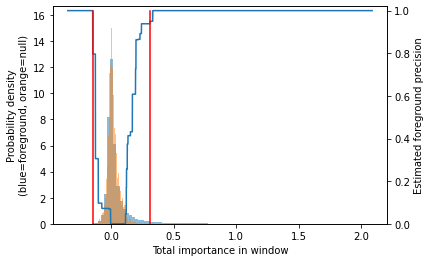

Got 6628 coords
After resolving overlaps, got 6628 seqlets
Across all tasks, the weakest transformed threshold used was: 0.904262090383004
MEMORY 1.901215744
6628 identified in total
2 activity patterns with support >= 100 out of 2 possible patterns
Metacluster sizes:  [6246, 382]
Idx to activities:  {0: '1', 1: '-1'}
MEMORY 1.901469696
On metacluster 1
Metacluster size 382
Relevant tasks:  ('task0',)
Relevant signs:  (-1,)
TfModiscoSeqletsToPatternsFactory: seed=1234
(Round 1) num seqlets: 382
(Round 1) Computing coarse affmat
MEMORY 1.932935168
Beginning embedding computation
MEMORY 1.932935168
Computing embeddings


Using TensorFlow backend.






Finished embedding computation in 10.85 s
MEMORY 3.925467136
Starting affinity matrix computations
MEMORY 3.925467136
Batching in slices of size 382


100%|██████████| 1/1 [00:00<00:00,  1.19it/s]

Finished affinity matrix computations in 1.18 s
MEMORY 3.959816192


(Round 1) Computed coarse affmat
MEMORY 3.559251968
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 3.559251968
Launching nearest neighbors affmat calculation job
MEMORY 3.560587264
Parallel runs completed
MEMORY 3.587670016
Job completed in: 3.38 s
MEMORY 3.587670016
Launching nearest neighbors affmat calculation job
MEMORY 3.587670016
Parallel runs completed
MEMORY 3.600535552
Job completed in: 3.43 s
MEMORY 3.600535552
(Round 1) Computed affinity matrix on nearest neighbors in 7.08 s
MEMORY 3.600535552
Filtered down to 309 of 382
(Round 1) Retained 309 rows out of 382 after filtering
MEMORY 3.600809984
(Round 1) Computing density adapted affmat
MEMORY 3.606806528
[t-SNE] Computed conditional probabilities for sample 309 / 309
[t-SNE] Mean sigma: 0.258023
(Round 1) Computing clustering
MEMORY 3.607158784
Beginning preprocessing + Leiden


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    8.8s


Quality: 0.5864738993501071
Got 8 clusters after round 1
Counts:
{6: 11, 0: 88, 2: 69, 1: 70, 7: 9, 3: 28, 5: 17, 4: 17}
MEMORY 3.6114432
(Round 1) Aggregating seqlets in each cluster
MEMORY 3.6114432
Aggregating for cluster 0 with 88 seqlets
MEMORY 3.6114432


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   10.0s finished


Trimming eliminated 0 seqlets out of 88
Aggregating for cluster 1 with 70 seqlets
MEMORY 3.611447296
Trimming eliminated 0 seqlets out of 70
Aggregating for cluster 2 with 69 seqlets
MEMORY 3.611447296
Skipped 1 seqlets that went over sequence edge during flank expansion
Trimming eliminated 0 seqlets out of 68
Aggregating for cluster 3 with 28 seqlets
MEMORY 3.611447296
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out of 27
Aggregating for cluster 4 with 17 seqlets
MEMORY 3.611447296
Trimming eliminated 0 seqlets out of 17
Aggregating for cluster 5 with 17 seqlets
MEMORY 3.611459584
Skipped 1 seqlets that went over the sequence edge during flank expansion
Trimming eliminated 0 seqlets out of 16
Aggregating for cluster 6 with 11 seqlets
MEMORY 3.611459584
Trimming eliminated 0 seqlets out of 11
Dropping cluster 6 with 11 seqlets due to sign disagreement
Aggregating for cluster 7 with 9 seqlets
MEMORY 3.611459584
Trimming eliminated 0 seqlets out of 9
(Round 2) num seqlets: 

100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

Finished affinity matrix computations in 0.9 s
MEMORY 3.92200192
(Round 2) Computed coarse affmat
MEMORY 3.611090944
(Round 2) Computing affinity matrix on nearest neighbors
MEMORY 3.611090944
Launching nearest neighbors affmat calculation job
MEMORY 3.611090944


Parallel runs completed
MEMORY 3.61797632
Job completed in: 2.32 s
MEMORY 3.61797632
Launching nearest neighbors affmat calculation job
MEMORY 3.61797632
Parallel runs completed
MEMORY 3.62029056
Job completed in: 2.52 s
MEMORY 3.62029056
(Round 2) Computed affinity matrix on nearest neighbors in 5.07 s
MEMORY 3.62029056
Not applying filtering for rounds above first round
MEMORY 3.62029056
(Round 2) Computing density adapted affmat
MEMORY 3.622252544
[t-SNE] Computed conditional probabilities for sample 295 / 295
[t-SNE] Mean sigma: 0.262096
(Round 2) Computing clustering
MEMORY 3.622412288
Beginning preprocessing + Leiden


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.9s


Quality: 0.5819918240044838
Quality: 0.5837161166171201
Got 9 clusters after round 2
Counts:
{0: 86, 7: 6, 2: 62, 8: 2, 4: 25, 1: 63, 3: 25, 5: 16, 6: 10}
MEMORY 3.622387712
(Round 2) Aggregating seqlets in each cluster
MEMORY 3.622387712
Aggregating for cluster 0 with 86 seqlets
MEMORY 3.622387712


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    8.2s finished


Trimming eliminated 0 seqlets out of 86
Aggregating for cluster 1 with 63 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 63
Aggregating for cluster 2 with 62 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 62
Aggregating for cluster 3 with 25 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 25
Skipped 1 seqlets that went over the sequence edge during flank expansion
Aggregating for cluster 4 with 25 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 25
Aggregating for cluster 5 with 16 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 16
Aggregating for cluster 6 with 10 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 10
Aggregating for cluster 7 with 6 seqlets
MEMORY 3.622387712
Trimming eliminated 0 seqlets out of 6
Dropping cluster 7 with 6 seqlets due to sign disagreement
Aggregating for cluster 8 with 2 seqlets
MEMORY 3.622387712
Skipped 1 due to duplicates
Trimming eliminated 0 seqlets out 

100%|██████████| 1/1 [00:32<00:00, 32.34s/it]

Finished affinity matrix computations in 37.69 s
MEMORY 14.516641792


(Round 1) Computed coarse affmat
MEMORY 7.967227904
(Round 1) Computing affinity matrix on nearest neighbors
MEMORY 7.967227904
Launching nearest neighbors affmat calculation job
MEMORY 8.010268672


In [ ]:
null_per_pos_scores = modisco.coordproducers.LaplaceNullDist(num_to_samp=5000)

tfmodisco_patterns_factory = modisco.tfmodisco_workflow.seqlets_to_patterns.TfModiscoSeqletsToPatternsFactory(
    trim_to_window_size=20, initial_flank_to_add=5, kmer_len=8, num_gaps=1,
    num_mismatches=0, final_min_cluster_size=100)

tfmodisco_workflow = modisco.tfmodisco_workflow.workflow.TfModiscoWorkflow(
    #Slight modifications from the default settings
    sliding_window_size=20, flank_size=5, target_seqlet_fdr=0.05,
    max_seqlets_per_metacluster=25000,
    seqlets_to_patterns_factory=tfmodisco_patterns_factory)

tfmodisco_results = tfmodisco_workflow(task_names=["task0"],
                                       contrib_scores=task_to_scores,
                                       hypothetical_contribs=task_to_hyp_scores,
                                       one_hot=onehot_data,
                                       null_per_pos_scores = null_per_pos_scores)

In [16]:
tfmodisco_results

In [ ]:
import h5py
import modisco.util

![[ -e results.hdf5 ]] && rm results.hdf5
grp = h5py.File("results_cluster_idx16_peak_set_neural_open_iPSC_v0.5.14-beta.hdf5", "w")
tfmodisco_results.save_hdf5(grp)
grp.close()

Metaclusters heatmap


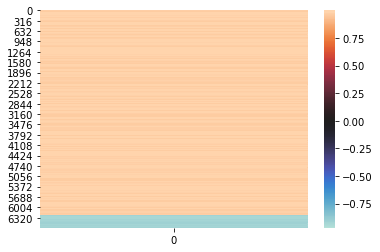

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 1217
Task 0 hypothetical scores:


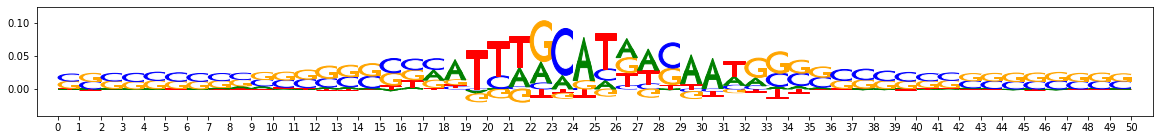

Task 0 actual importance scores:


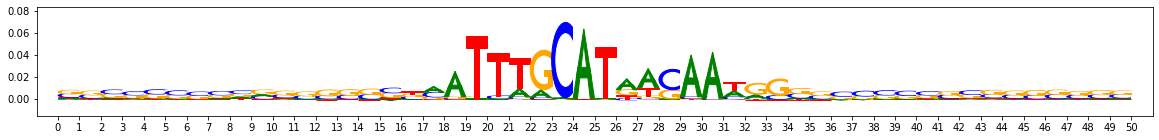

onehot, fwd and rev:


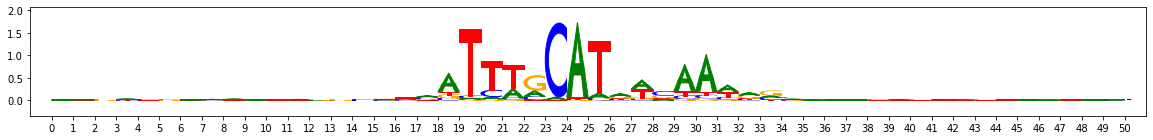

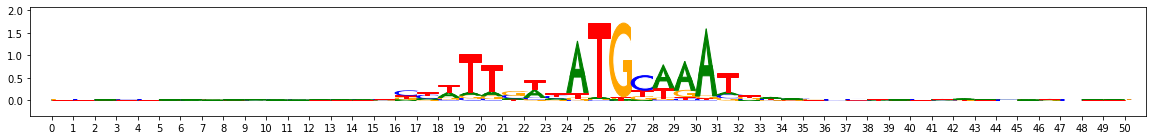

metacluster_0 pattern_1
total seqlets: 754
Task 0 hypothetical scores:


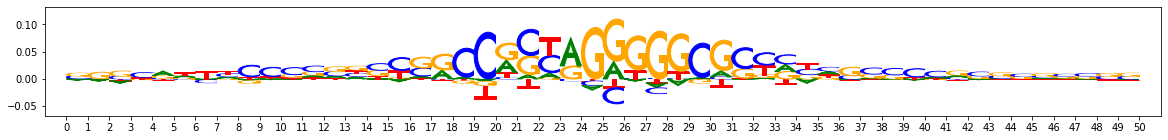

Task 0 actual importance scores:


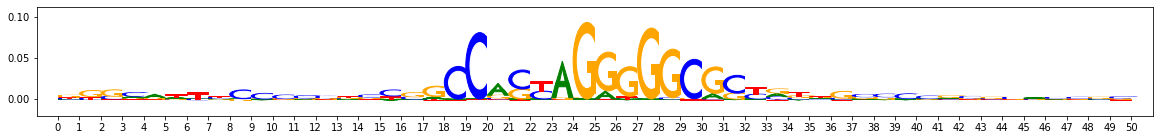

onehot, fwd and rev:


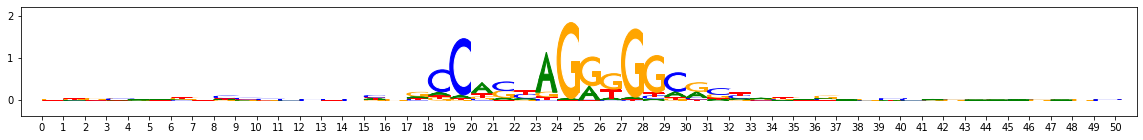

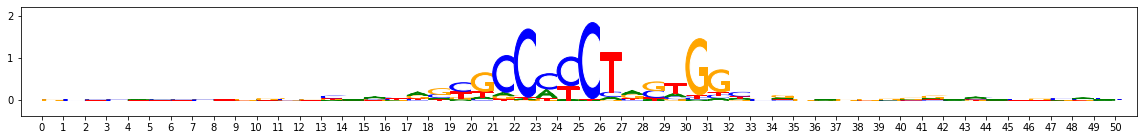

metacluster_0 pattern_2
total seqlets: 539
Task 0 hypothetical scores:


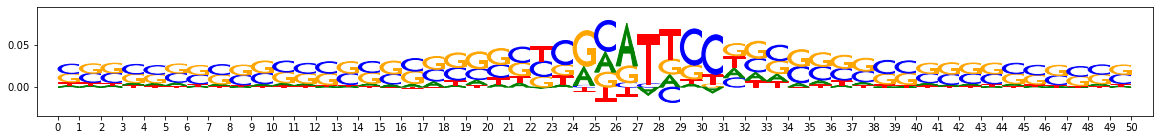

Task 0 actual importance scores:


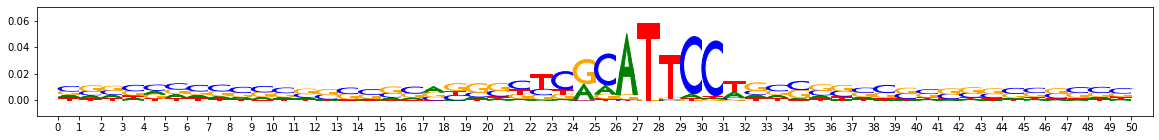

onehot, fwd and rev:


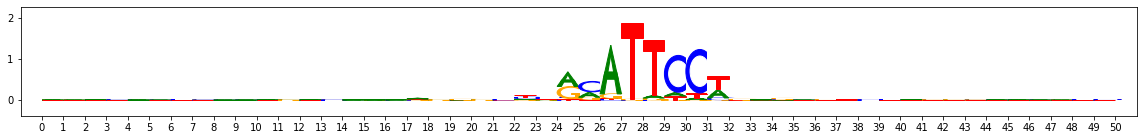

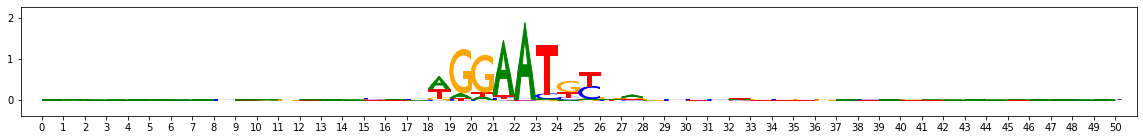

metacluster_0 pattern_3
total seqlets: 319
Task 0 hypothetical scores:


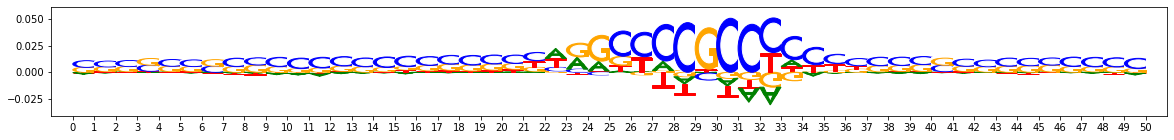

Task 0 actual importance scores:


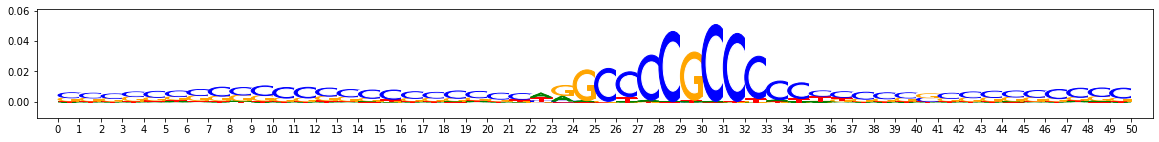

onehot, fwd and rev:


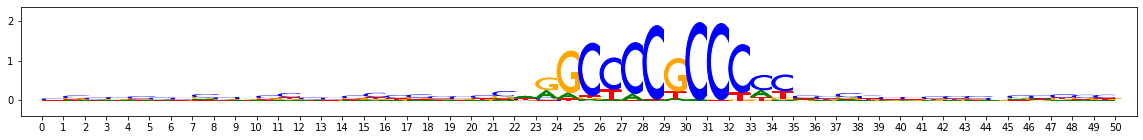

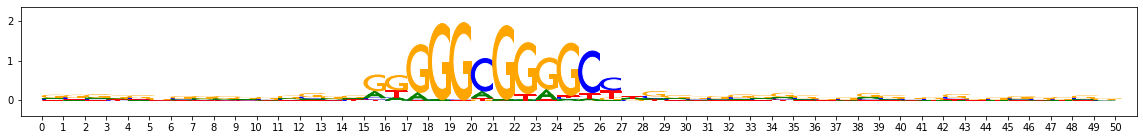

metacluster_0 pattern_4
total seqlets: 297
Task 0 hypothetical scores:


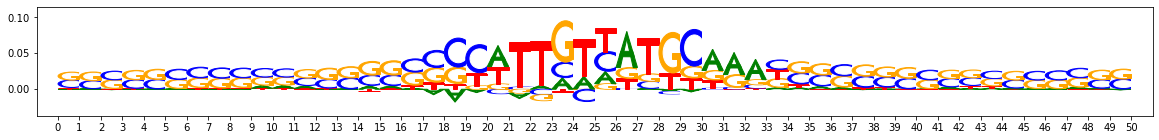

Task 0 actual importance scores:


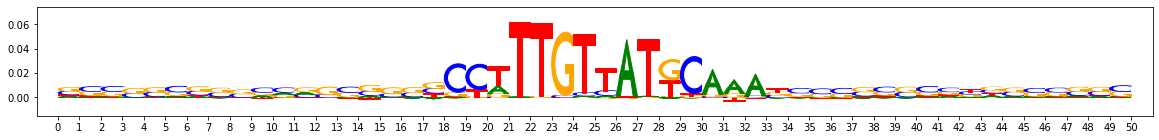

onehot, fwd and rev:


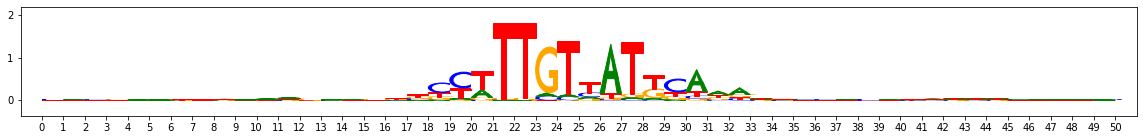

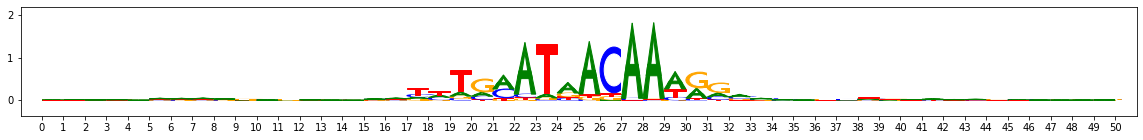

metacluster_0 pattern_5
total seqlets: 361
Task 0 hypothetical scores:


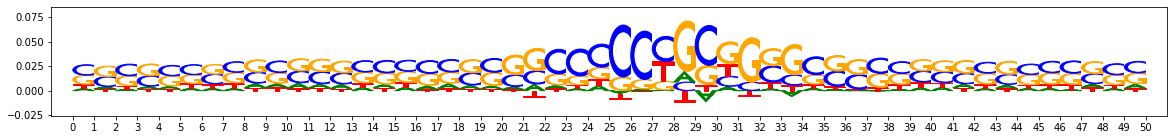

Task 0 actual importance scores:


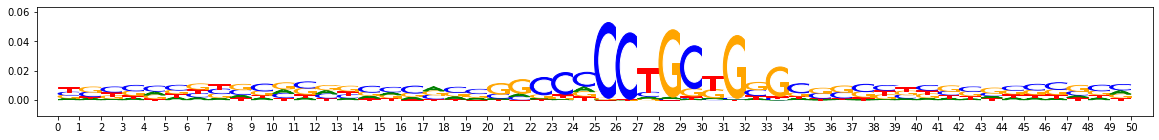

onehot, fwd and rev:


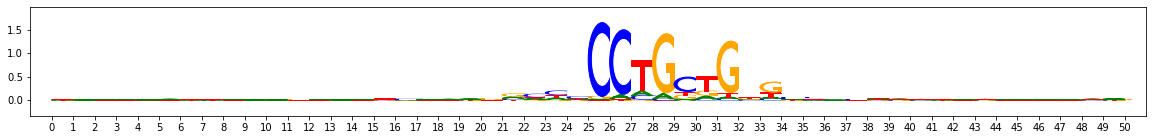

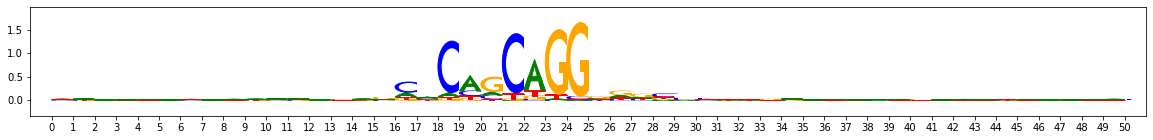

metacluster_0 pattern_6
total seqlets: 172
Task 0 hypothetical scores:


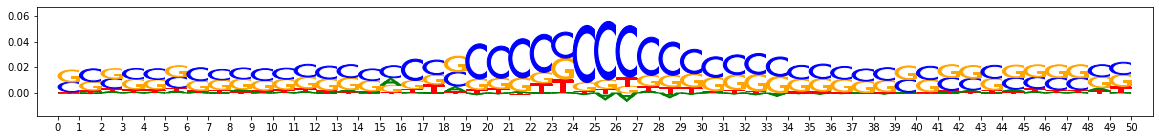

Task 0 actual importance scores:


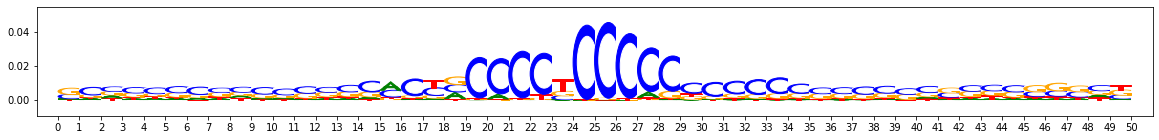

onehot, fwd and rev:


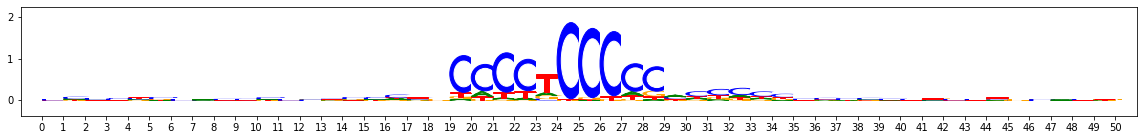

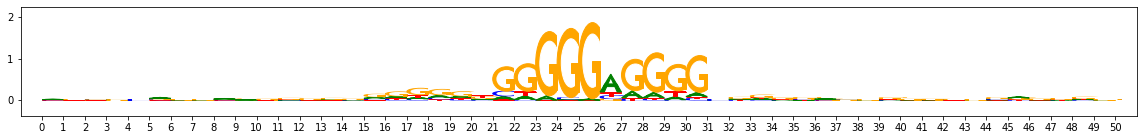

metacluster_0 pattern_7
total seqlets: 203
Task 0 hypothetical scores:


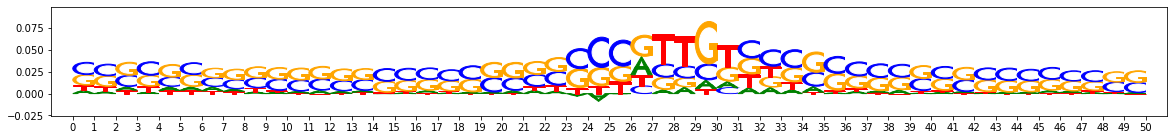

Task 0 actual importance scores:


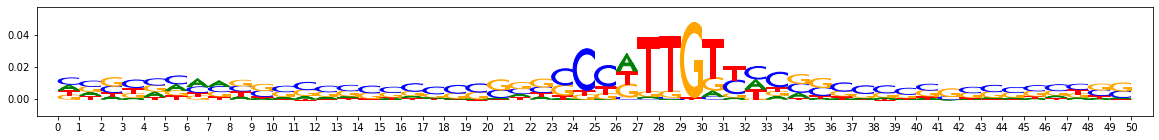

onehot, fwd and rev:


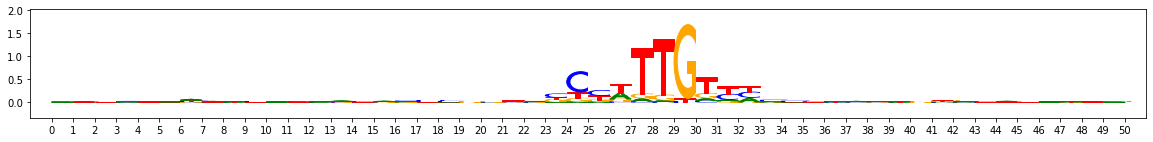

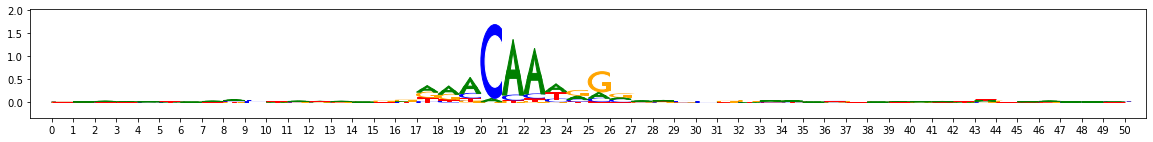

metacluster_1
activity pattern: [-1]
No motifs found for this activity pattern


In [17]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

hdf5_results = h5py.File("results_cluster_idx16_peak_set_neural_open_iPSC_v0.5.14-beta.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        #Plot the subclustering too, if available
#         if ("subclusters" in pattern):
#             print("PLOTTING SUBCLUSTERS")
#             subclusters = np.array(pattern["subclusters"])
#             twod_embedding = np.array(pattern["twod_embedding"])
#             plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
#             plt.show()
#             for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
#                 subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
#                 print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
#                 subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
#                 plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
#                 plt.show()
#                 viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
#                 viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                
#                 viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(subpattern["sequence"]["fwd"]),
#                                                         background=background)) 
#                 viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(subpattern["sequence"]["rev"]),
#                                                         background=background))
#         break
hdf5_results.close()

Metaclusters heatmap


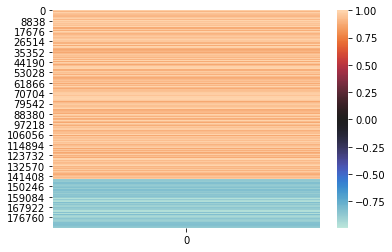

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 1162
Task 0 hypothetical scores:


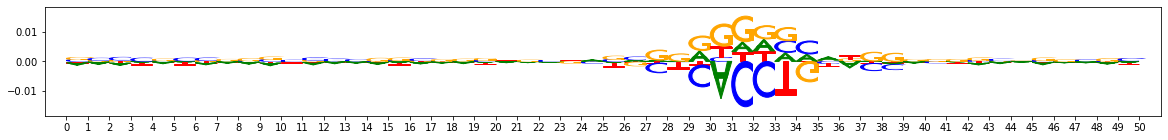

Task 0 actual importance scores:


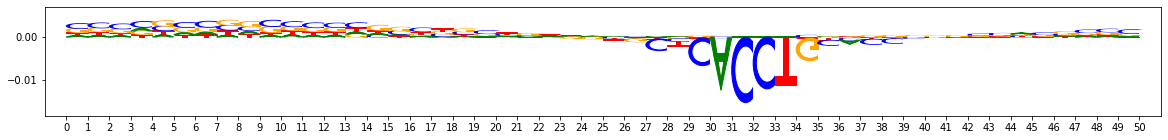

onehot, fwd and rev:


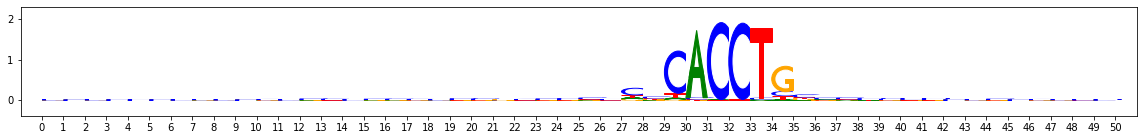

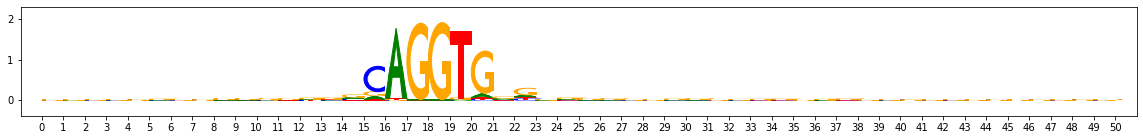

metacluster_1 pattern_1
total seqlets: 1028
Task 0 hypothetical scores:


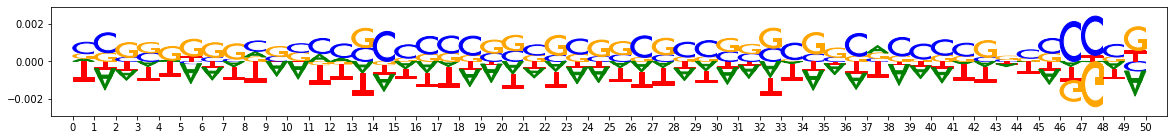

Task 0 actual importance scores:


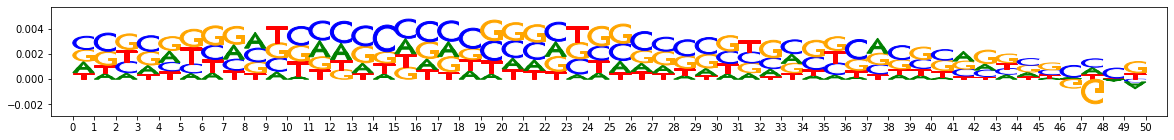

onehot, fwd and rev:


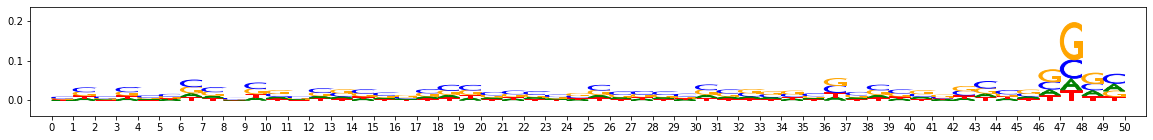

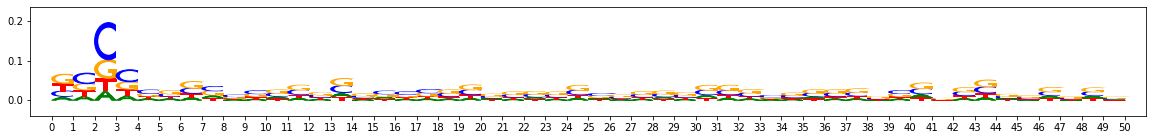

metacluster_1 pattern_2
total seqlets: 255
Task 0 hypothetical scores:


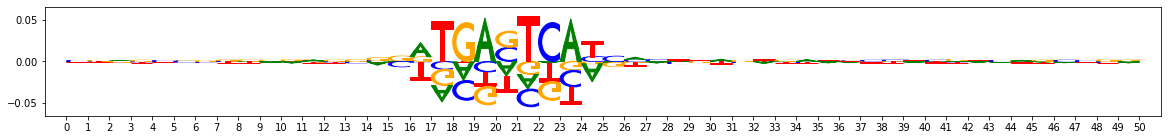

Task 0 actual importance scores:


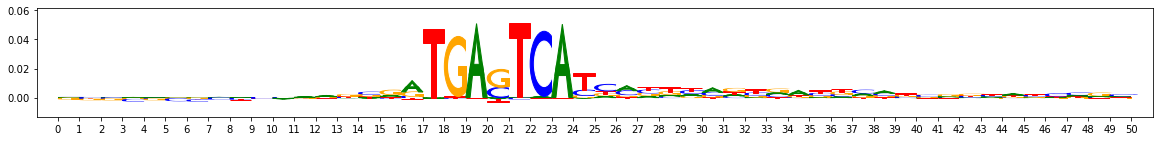

onehot, fwd and rev:


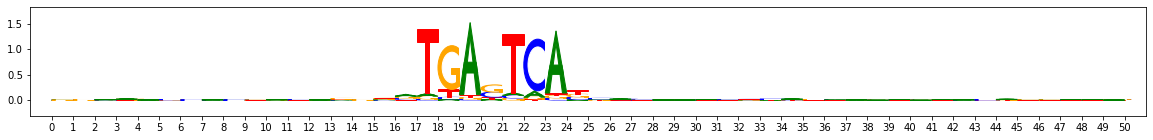

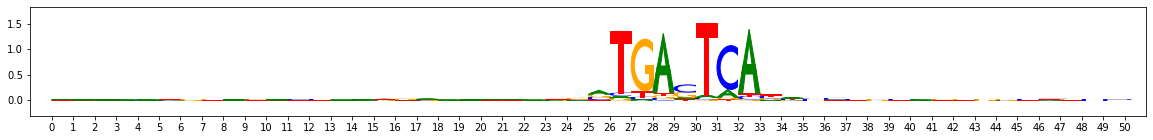

metacluster_1 pattern_3
total seqlets: 183
Task 0 hypothetical scores:


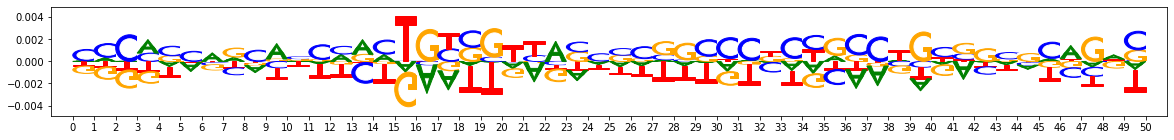

Task 0 actual importance scores:


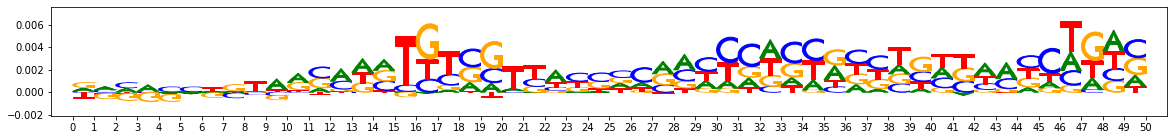

onehot, fwd and rev:


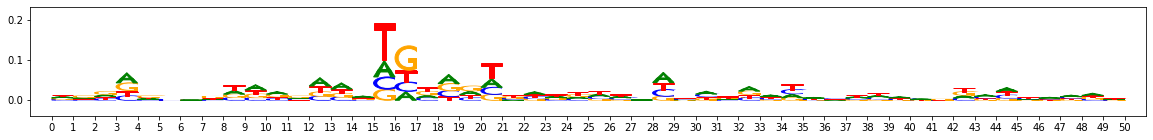

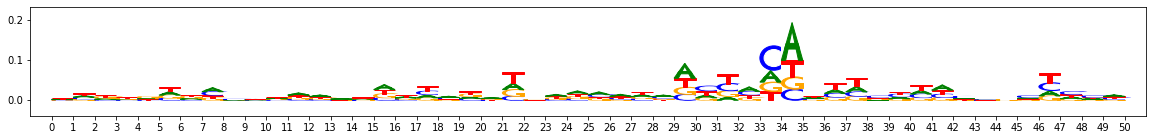

metacluster_1 pattern_4
total seqlets: 158
Task 0 hypothetical scores:


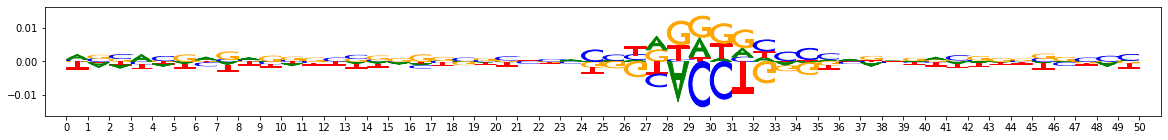

Task 0 actual importance scores:


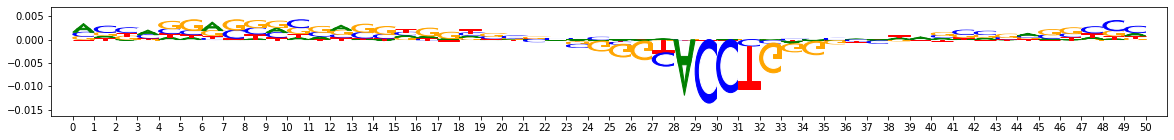

onehot, fwd and rev:


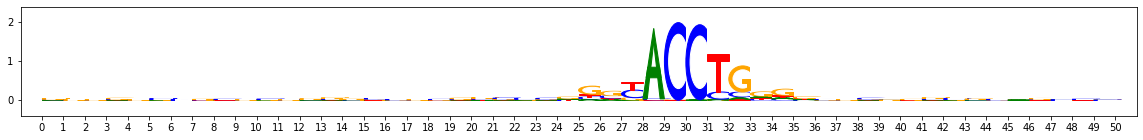

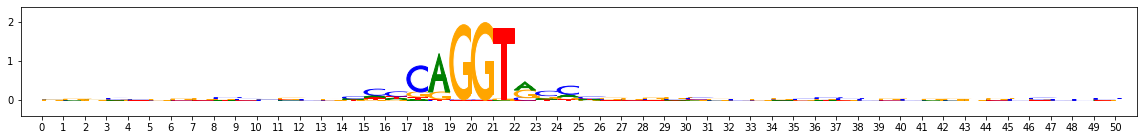

metacluster_1 pattern_5
total seqlets: 147
Task 0 hypothetical scores:


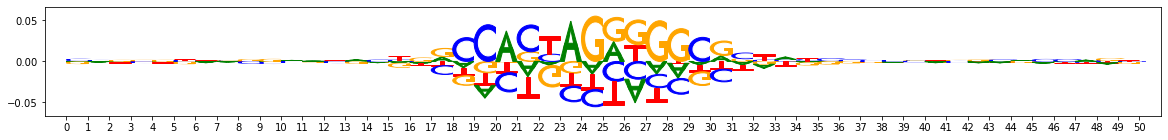

Task 0 actual importance scores:


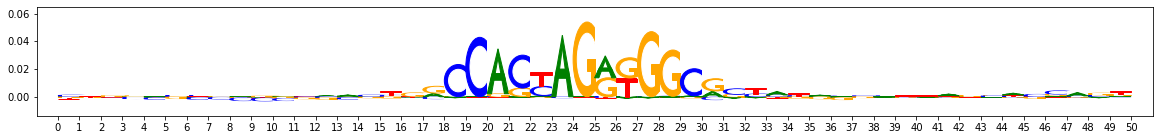

onehot, fwd and rev:


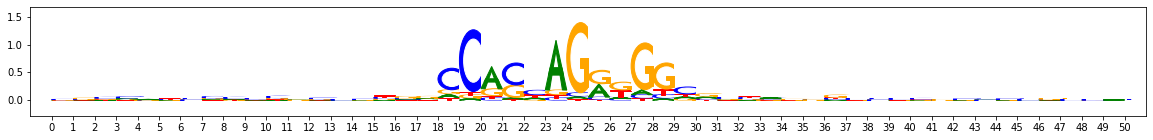

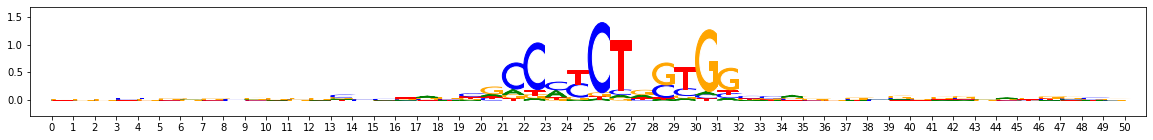

metacluster_1 pattern_6
total seqlets: 142
Task 0 hypothetical scores:


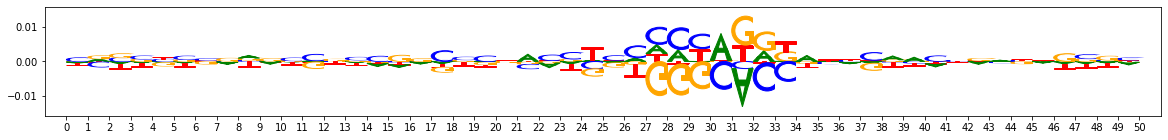

Task 0 actual importance scores:


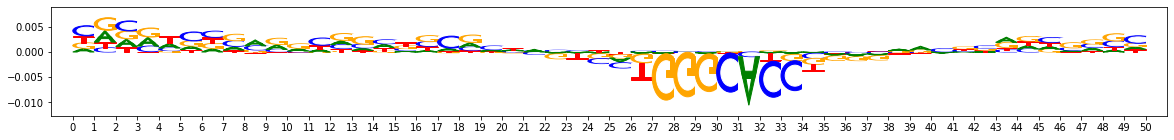

onehot, fwd and rev:


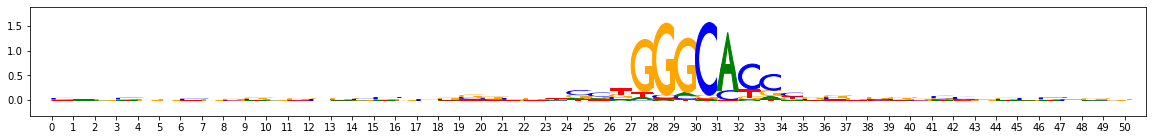

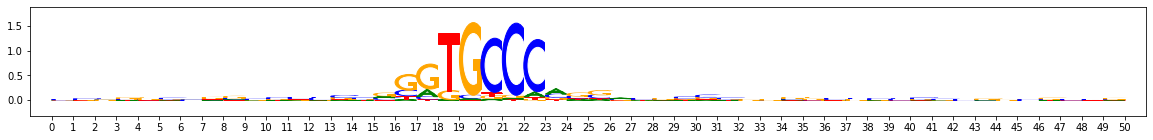

metacluster_1 pattern_7
total seqlets: 140
Task 0 hypothetical scores:


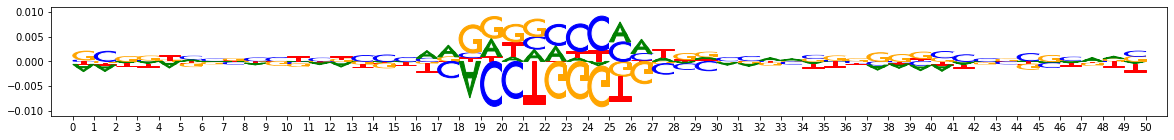

Task 0 actual importance scores:


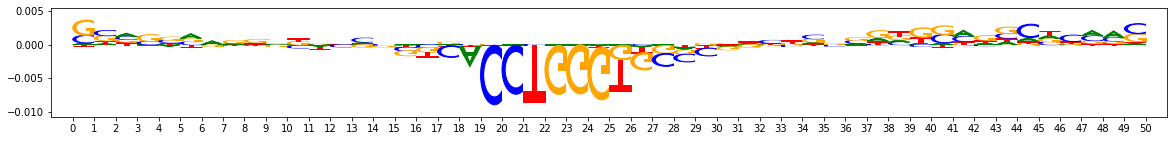

onehot, fwd and rev:


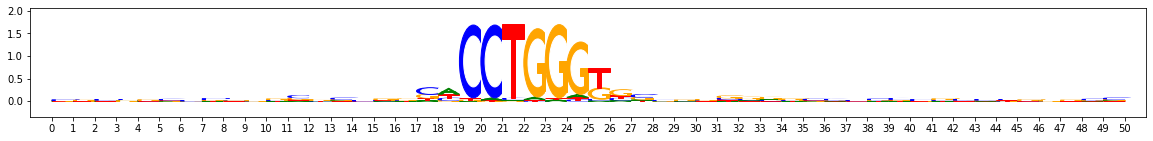

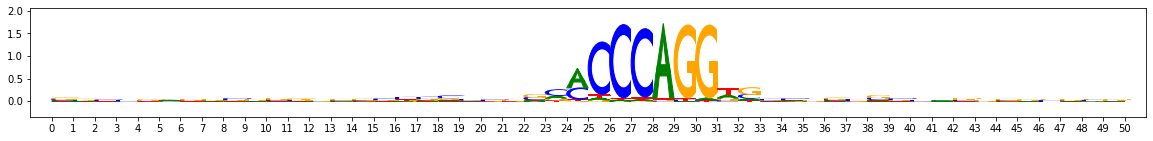

metacluster_1 pattern_8
total seqlets: 130
Task 0 hypothetical scores:


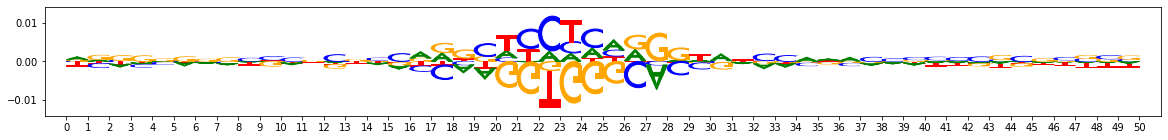

Task 0 actual importance scores:


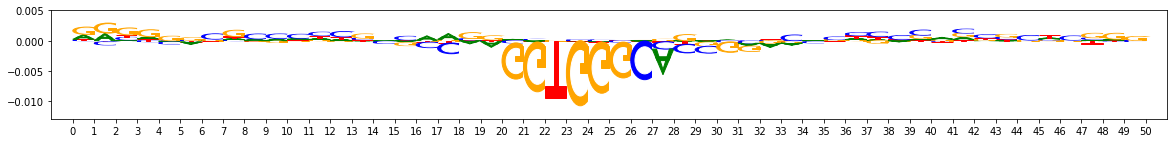

onehot, fwd and rev:


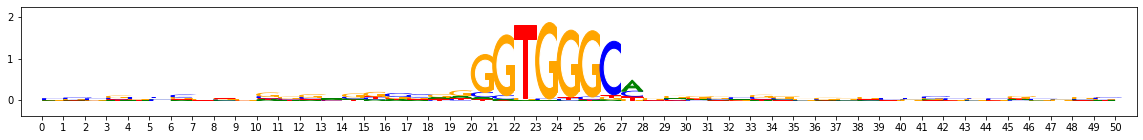

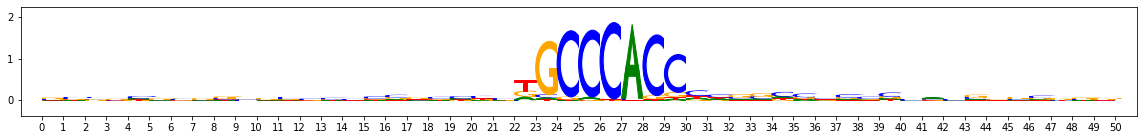

metacluster_1 pattern_9
total seqlets: 125
Task 0 hypothetical scores:


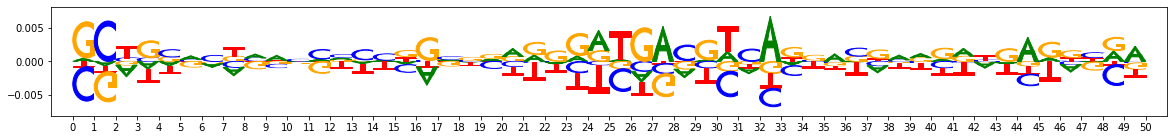

Task 0 actual importance scores:


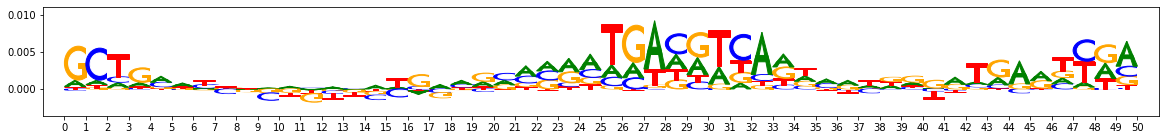

onehot, fwd and rev:


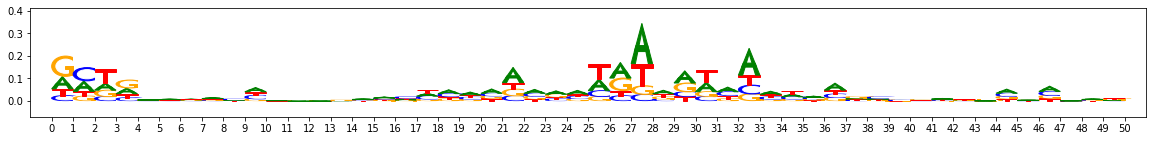

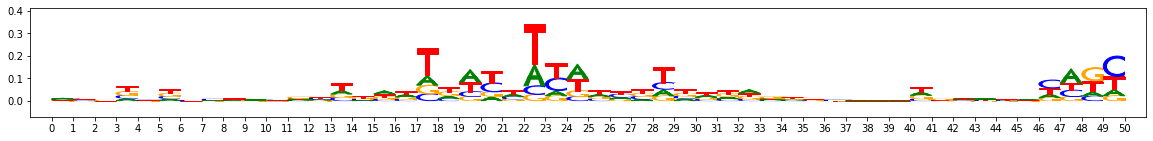

metacluster_1 pattern_10
total seqlets: 122
Task 0 hypothetical scores:


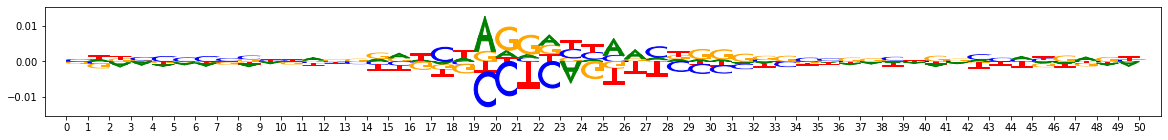

Task 0 actual importance scores:


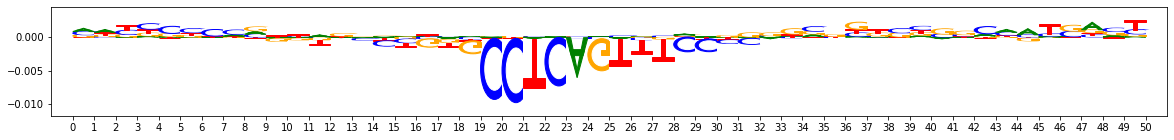

onehot, fwd and rev:


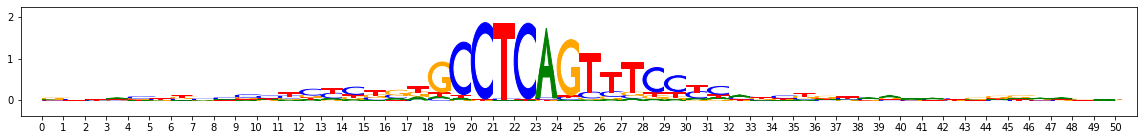

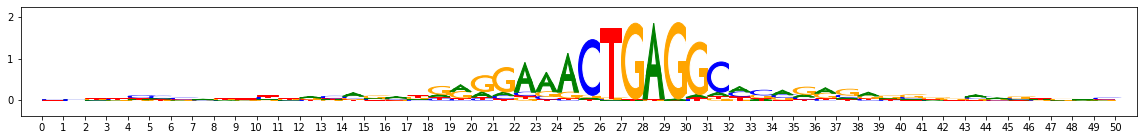

metacluster_1 pattern_11
total seqlets: 115
Task 0 hypothetical scores:


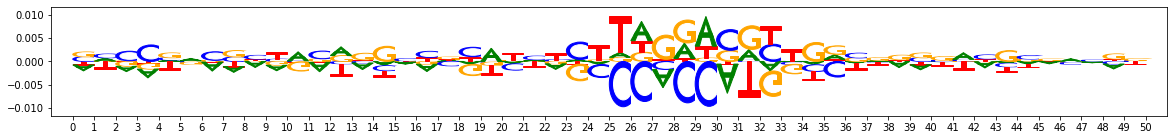

Task 0 actual importance scores:


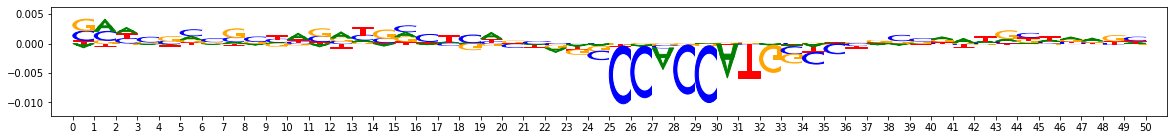

onehot, fwd and rev:


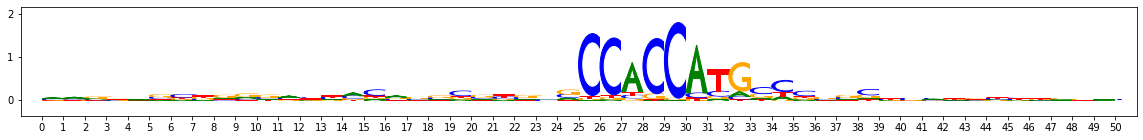

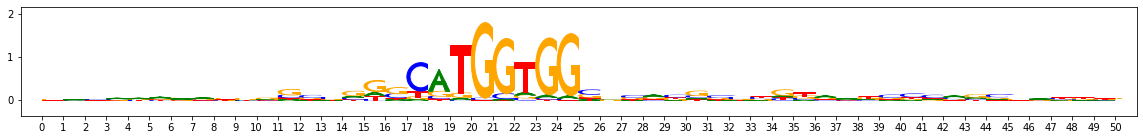

metacluster_1 pattern_12
total seqlets: 110
Task 0 hypothetical scores:


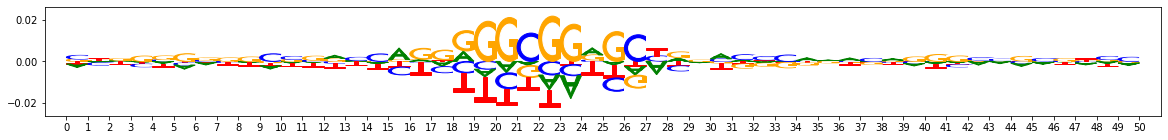

Task 0 actual importance scores:


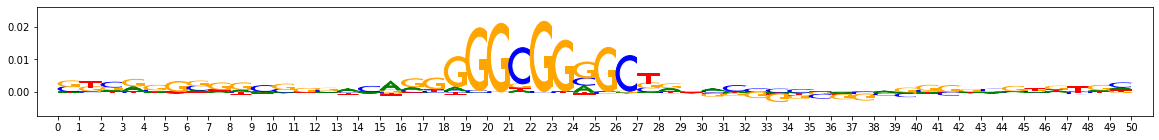

onehot, fwd and rev:


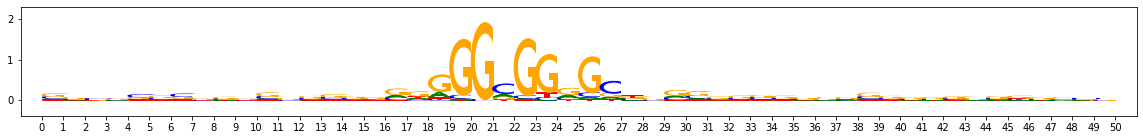

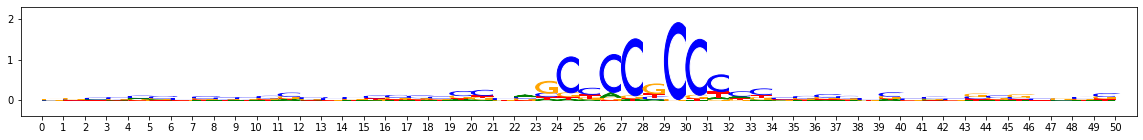

metacluster_1 pattern_13
total seqlets: 109
Task 0 hypothetical scores:


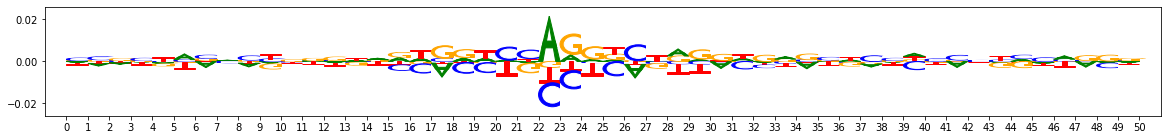

Task 0 actual importance scores:


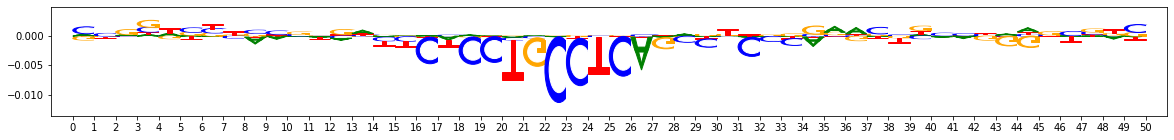

onehot, fwd and rev:


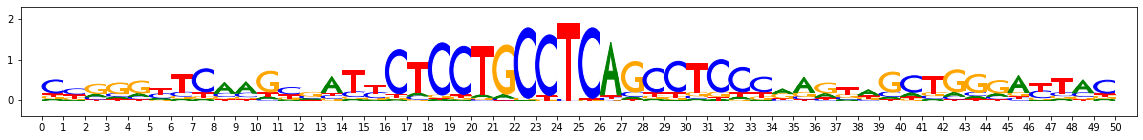

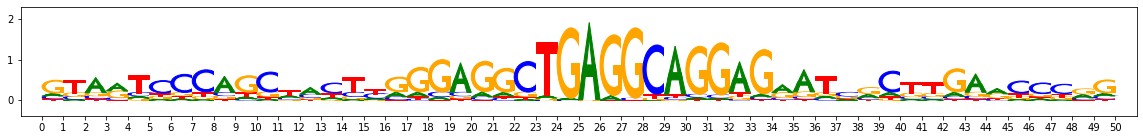

metacluster_1 pattern_14
total seqlets: 97
Task 0 hypothetical scores:


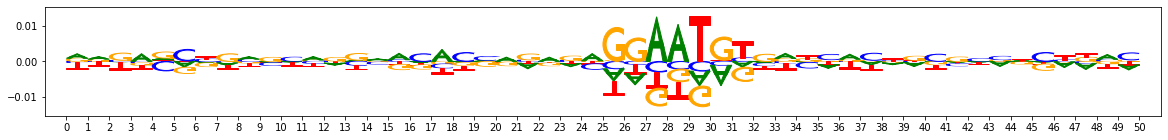

Task 0 actual importance scores:


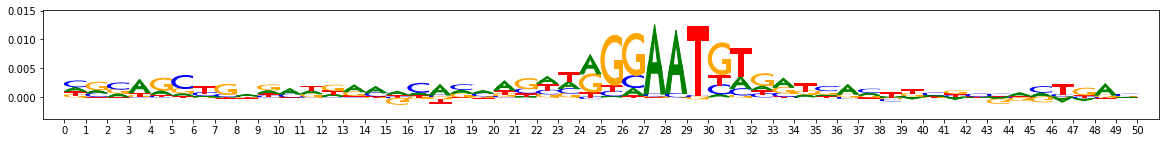

onehot, fwd and rev:


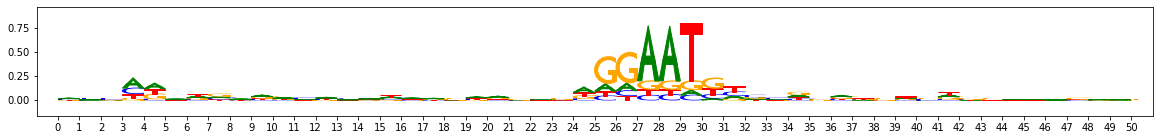

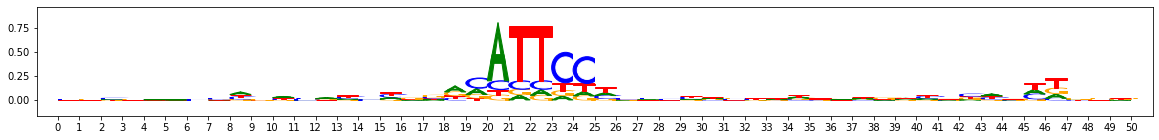

metacluster_1 pattern_15
total seqlets: 93
Task 0 hypothetical scores:


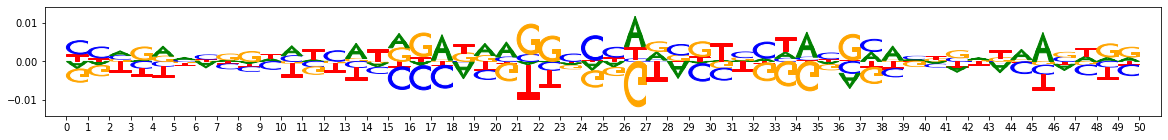

Task 0 actual importance scores:


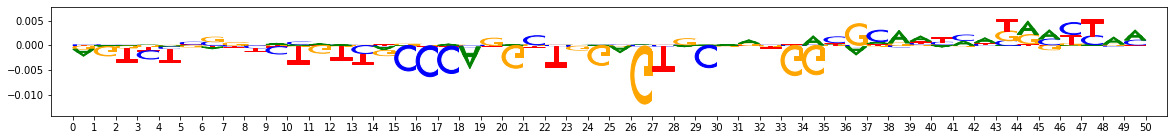

onehot, fwd and rev:


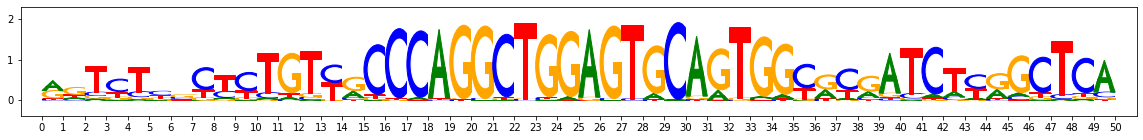

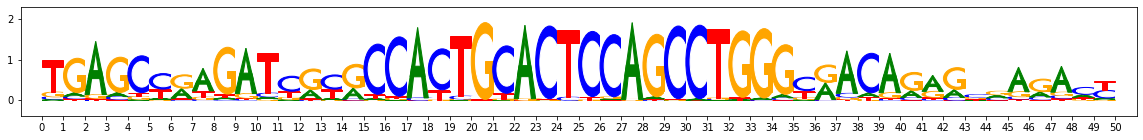

metacluster_1 pattern_16
total seqlets: 82
Task 0 hypothetical scores:


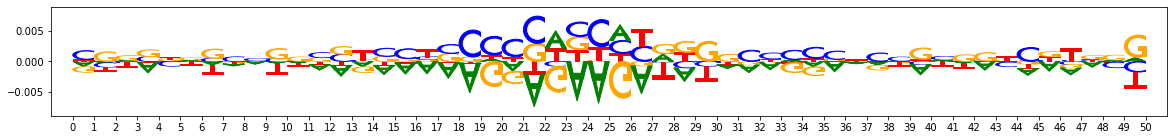

Task 0 actual importance scores:


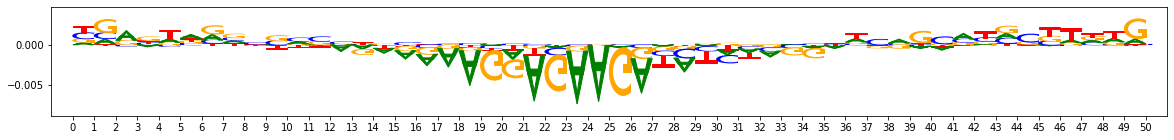

onehot, fwd and rev:


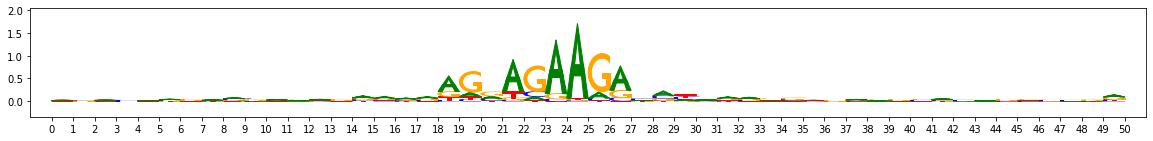

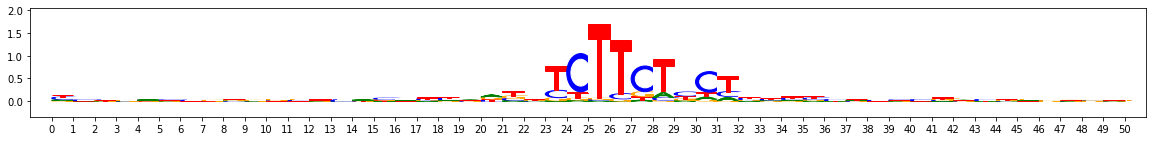

metacluster_1 pattern_17
total seqlets: 80
Task 0 hypothetical scores:


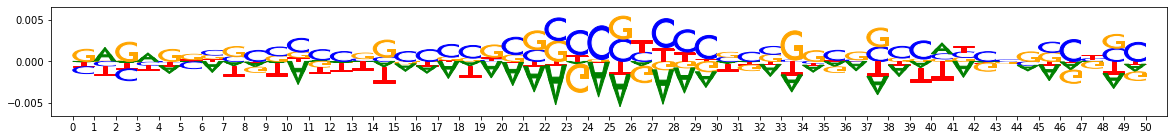

Task 0 actual importance scores:


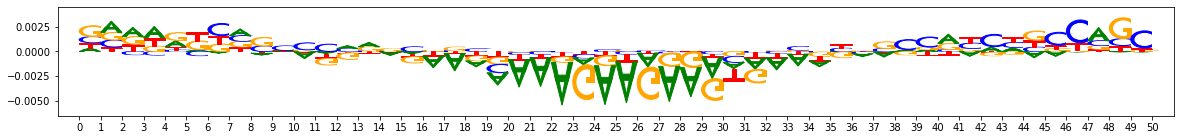

onehot, fwd and rev:


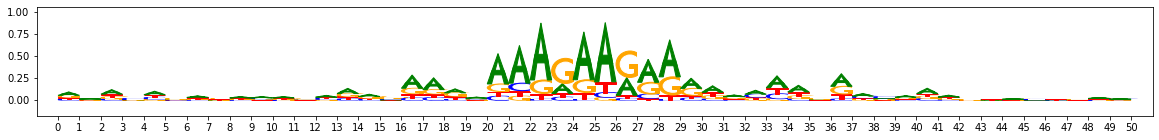

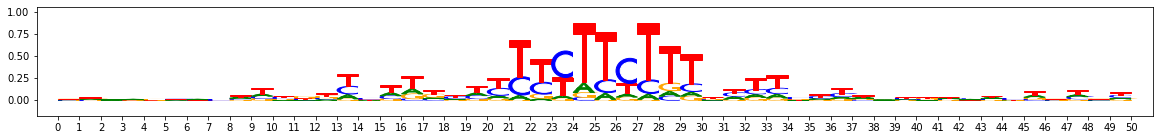

metacluster_1 pattern_18
total seqlets: 74
Task 0 hypothetical scores:


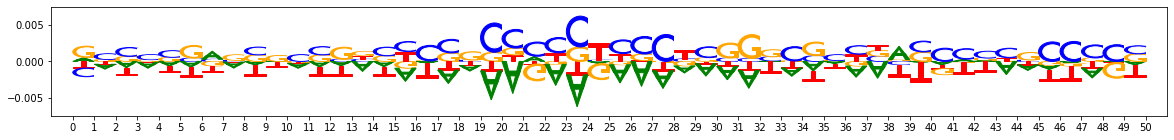

Task 0 actual importance scores:


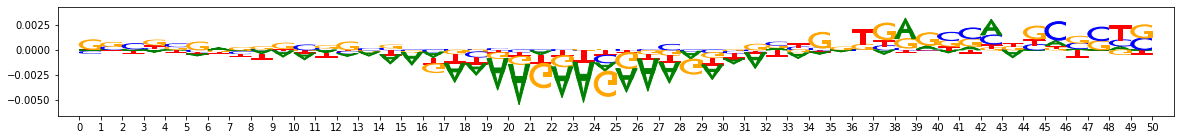

onehot, fwd and rev:


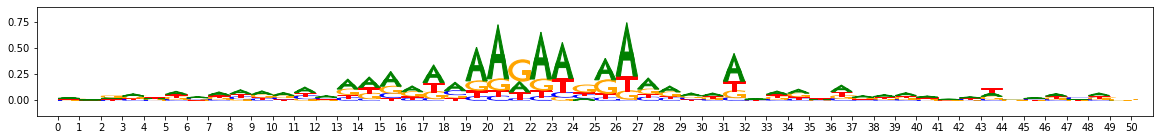

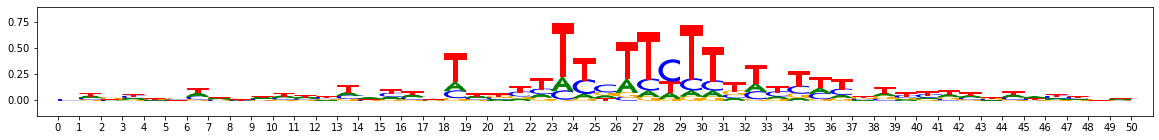

metacluster_1 pattern_19
total seqlets: 69
Task 0 hypothetical scores:


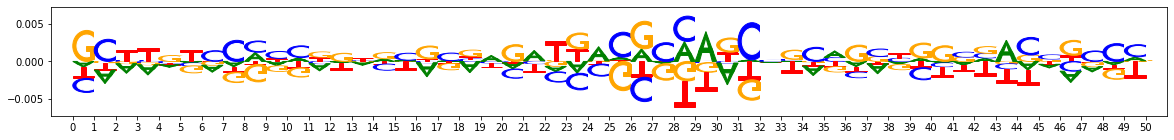

Task 0 actual importance scores:


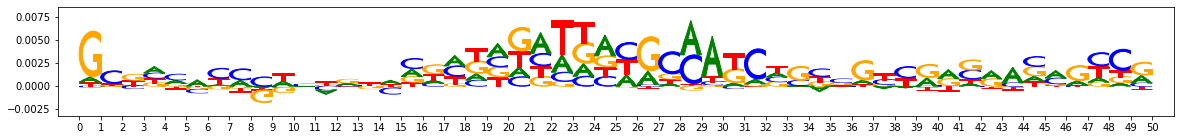

onehot, fwd and rev:


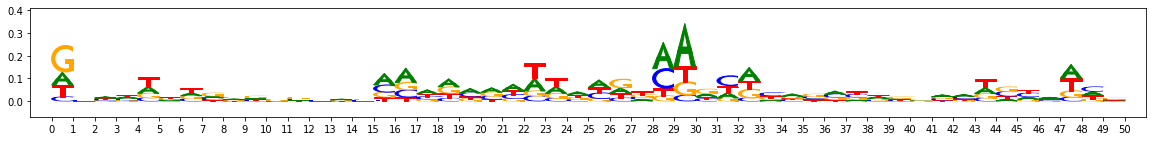

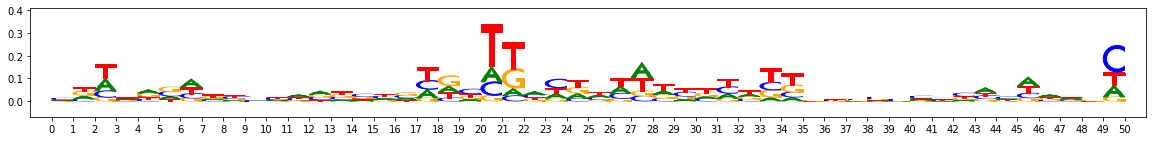

metacluster_1 pattern_20
total seqlets: 74
Task 0 hypothetical scores:


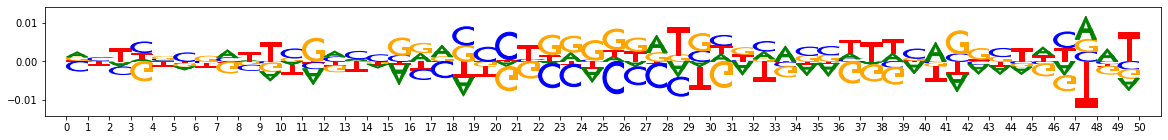

Task 0 actual importance scores:


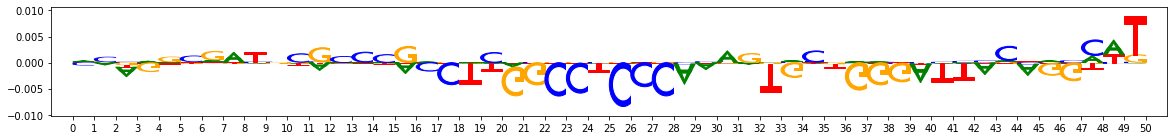

onehot, fwd and rev:


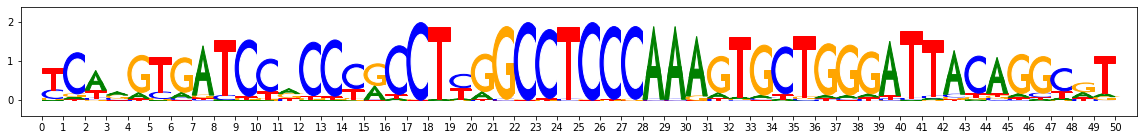

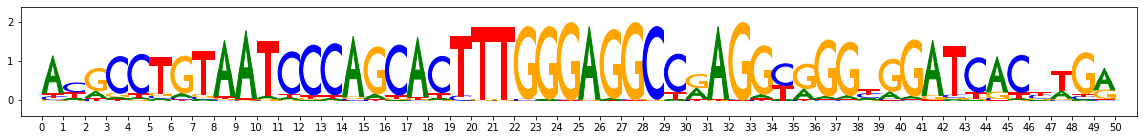

metacluster_1 pattern_21
total seqlets: 57
Task 0 hypothetical scores:


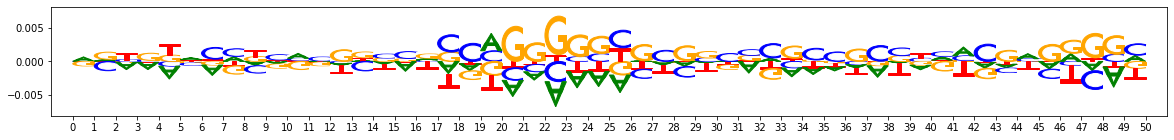

Task 0 actual importance scores:


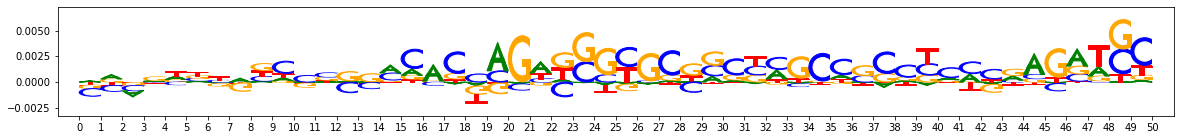

onehot, fwd and rev:


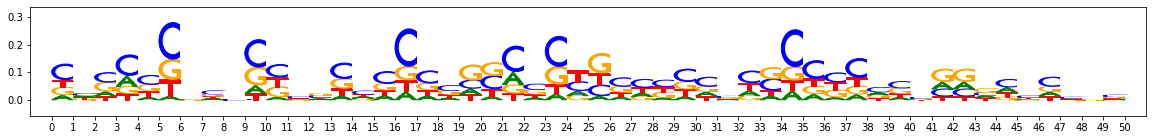

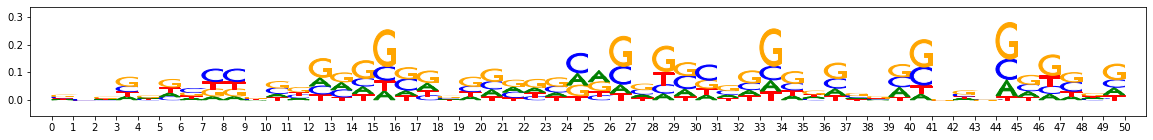

metacluster_1 pattern_22
total seqlets: 47
Task 0 hypothetical scores:


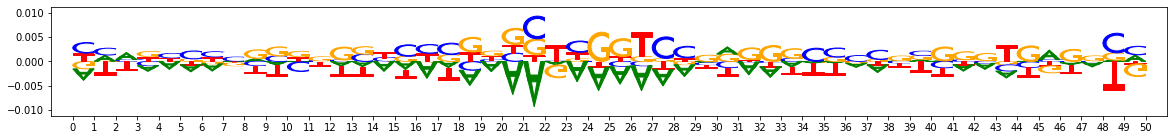

Task 0 actual importance scores:


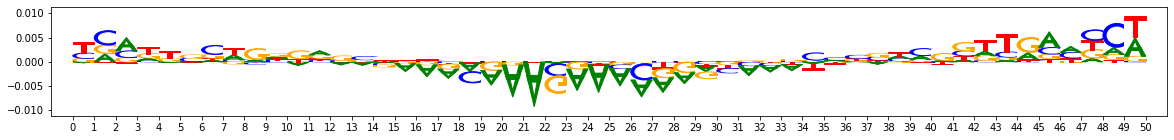

onehot, fwd and rev:


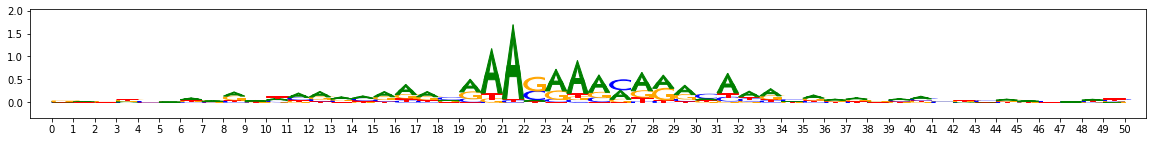

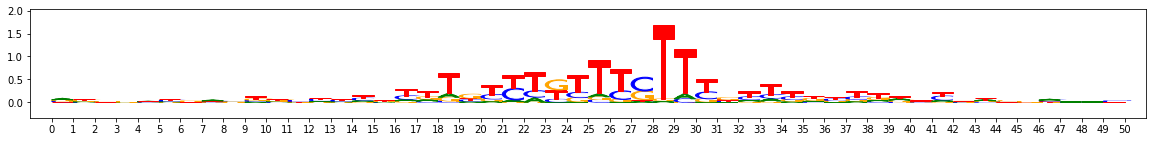

metacluster_1 pattern_23
total seqlets: 39
Task 0 hypothetical scores:


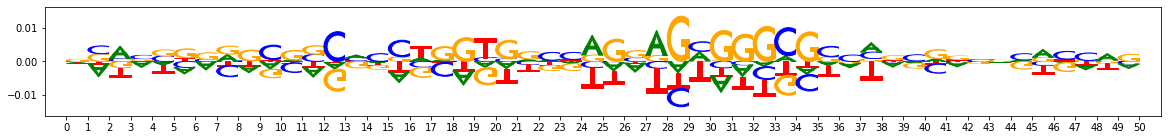

Task 0 actual importance scores:


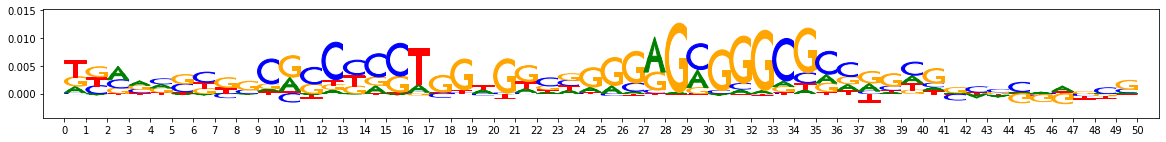

onehot, fwd and rev:


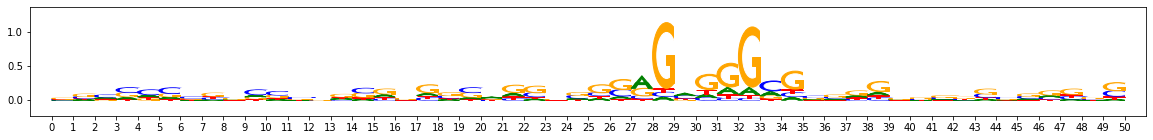

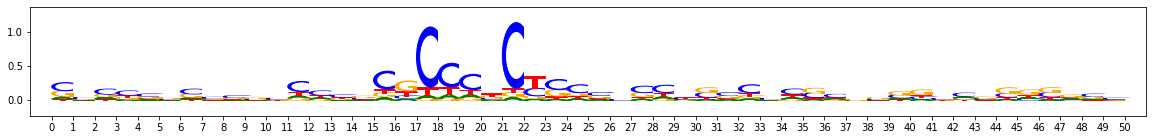

metacluster_1 pattern_24
total seqlets: 37
Task 0 hypothetical scores:


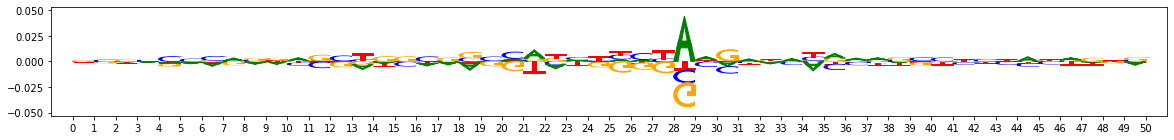

Task 0 actual importance scores:


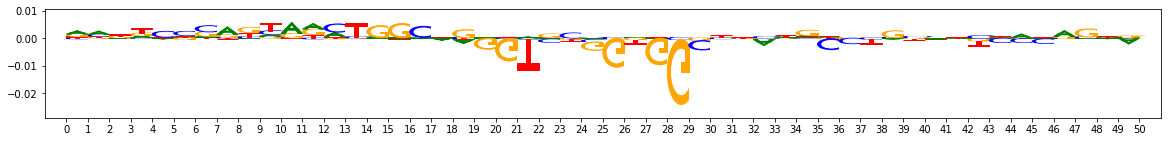

onehot, fwd and rev:


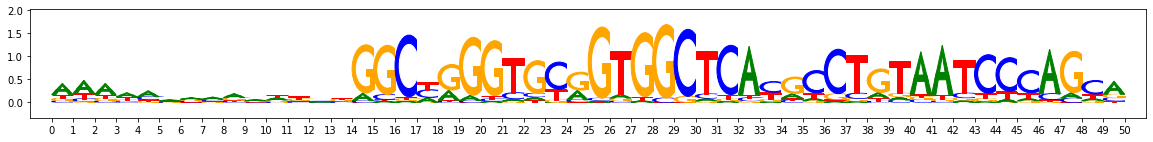

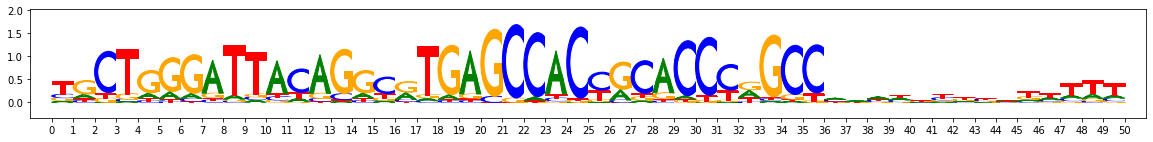

metacluster_1 pattern_25
total seqlets: 35
Task 0 hypothetical scores:


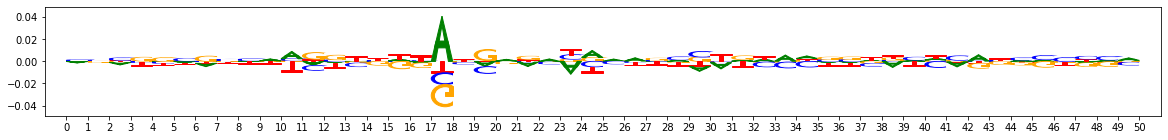

Task 0 actual importance scores:


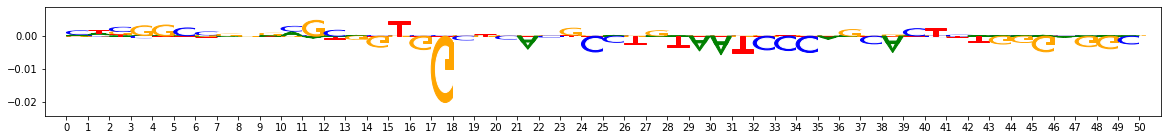

onehot, fwd and rev:


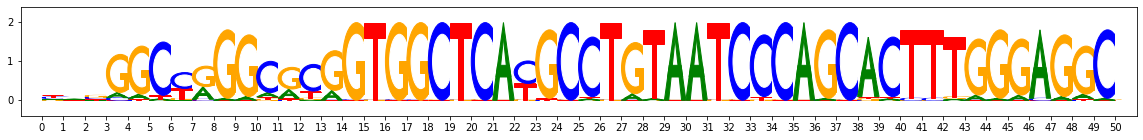

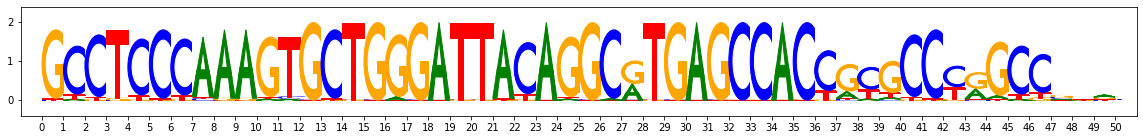

metacluster_1 pattern_26
total seqlets: 30
Task 0 hypothetical scores:


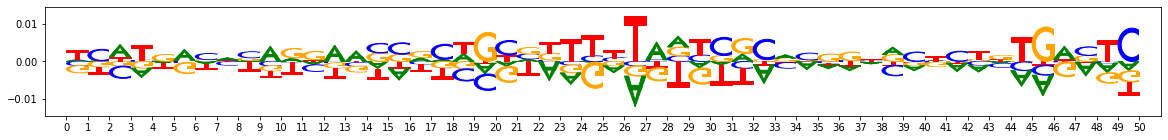

Task 0 actual importance scores:


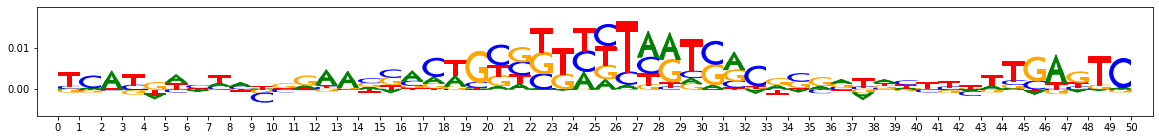

onehot, fwd and rev:


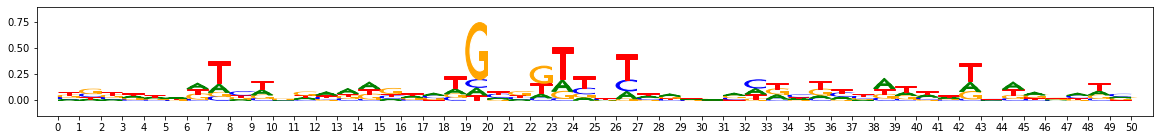

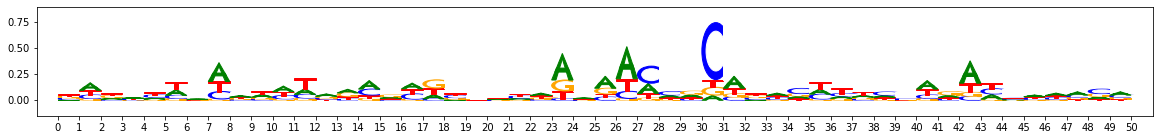

metacluster_1 pattern_27
total seqlets: 29
Task 0 hypothetical scores:


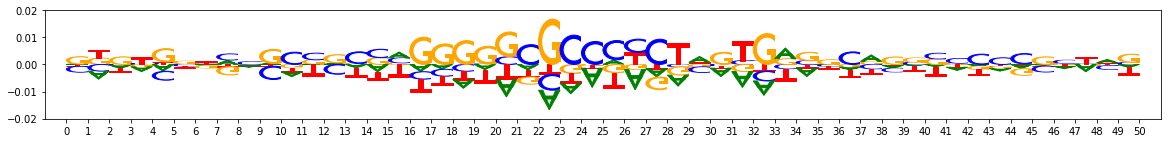

Task 0 actual importance scores:


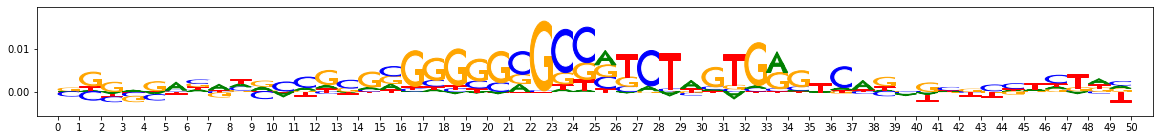

onehot, fwd and rev:


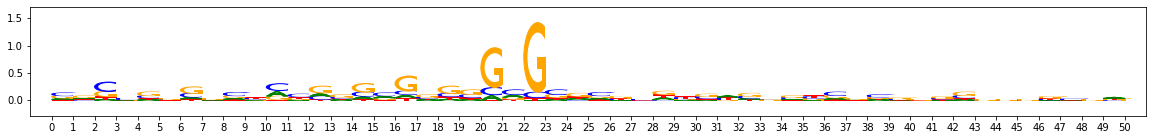

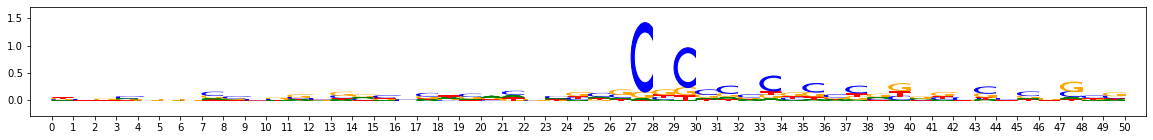

metacluster_1 pattern_28
total seqlets: 28
Task 0 hypothetical scores:


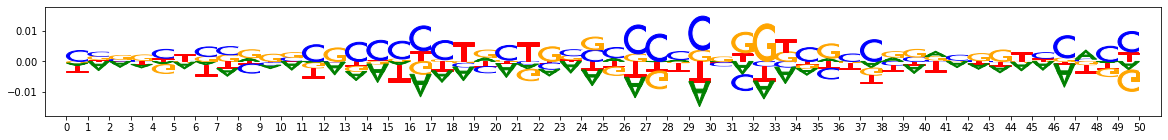

Task 0 actual importance scores:


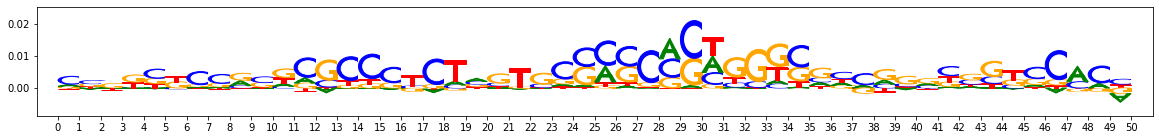

onehot, fwd and rev:


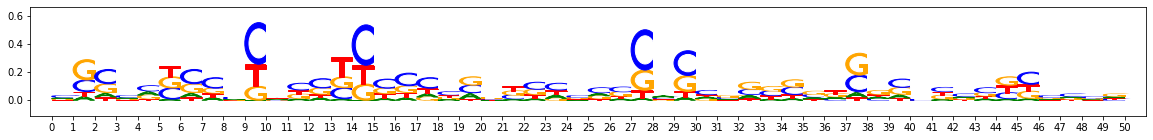

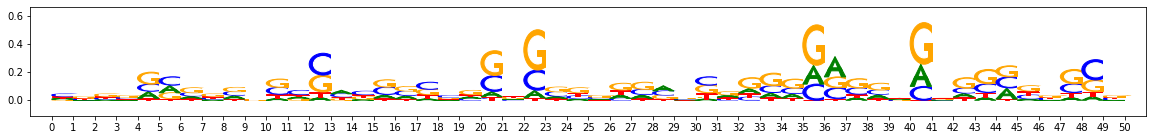

metacluster_1 pattern_29
total seqlets: 27
Task 0 hypothetical scores:


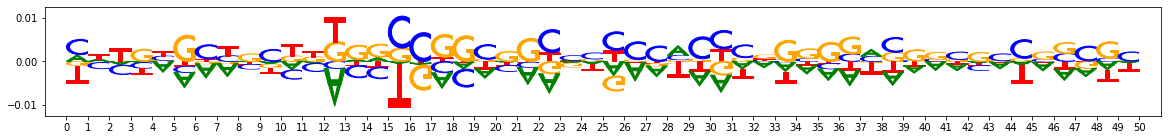

Task 0 actual importance scores:


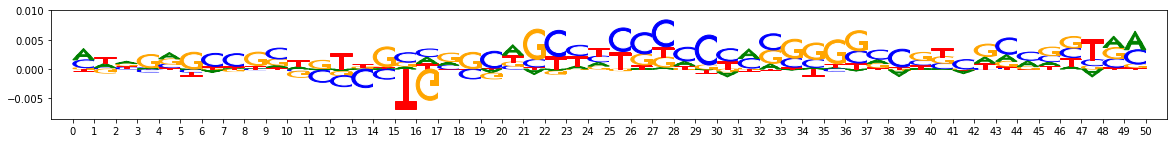

onehot, fwd and rev:


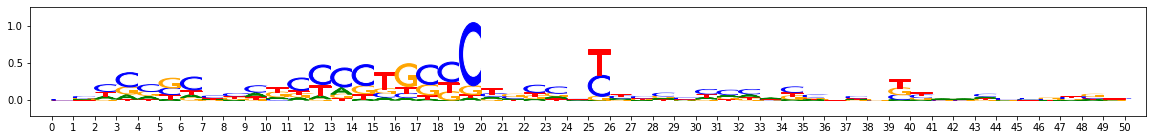

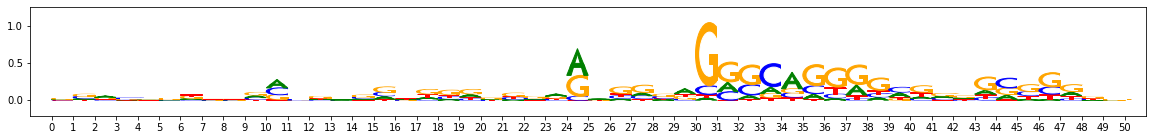

In [40]:
from collections import Counter
import numpy as np

from modisco.visualization import viz_sequence
from matplotlib import pyplot as plt

import modisco.affinitymat.core
import modisco.cluster.phenograph.core
import modisco.cluster.phenograph.cluster
import modisco.cluster.core
import modisco.aggregator

# hdf5_results = h5py.File("results_cluster_idx4_peak_set_8_modisco_v0.5.14-beta.hdf5","r")
hdf5_results = h5py.File("../20200702_modisco_summarize/data/20200518_n76052/svm/20k/cluster_idx5/modisco_results.hdf5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []
background = np.array([0.27, 0.23, 0.23, 0.27])

for metacluster_name in metacluster_names[1:]:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        #print("Task 1 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task1_hypothetical_contribs"]["fwd"])
        #print("Task 1 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task1_contrib_scores"]["fwd"])
        #print("Task 2 hypothetical scores:")
        #viz_sequence.plot_weights(pattern["task2_hypothetical_contribs"]["fwd"])
        #print("Task 2 actual importance scores:")
        #viz_sequence.plot_weights(pattern["task2_contrib_scores"]["fwd"])
        print("onehot, fwd and rev:")
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        #Plot the subclustering too, if available
#         if ("subclusters" in pattern):
#             print("PLOTTING SUBCLUSTERS")
#             subclusters = np.array(pattern["subclusters"])
#             twod_embedding = np.array(pattern["twod_embedding"])
#             plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=subclusters, cmap="tab20")
#             plt.show()
#             for subcluster_name in list(pattern["subcluster_to_subpattern"]["subcluster_names"]):
#                 subpattern = pattern["subcluster_to_subpattern"][subcluster_name]
#                 print(subcluster_name.decode("utf-8"), "size", len(subpattern["seqlets_and_alnmts"]["seqlets"]))
#                 subcluster = int(subcluster_name.decode("utf-8").split("_")[1])
#                 plt.scatter(twod_embedding[:,0], twod_embedding[:,1], c=(subclusters==subcluster))
#                 plt.show()
#                 viz_sequence.plot_weights(subpattern["task0_hypothetical_contribs"]["fwd"])
#                 viz_sequence.plot_weights(subpattern["task0_contrib_scores"]["fwd"])
                
#                 viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(subpattern["sequence"]["fwd"]),
#                                                         background=background)) 
#                 viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(subpattern["sequence"]["rev"]),
#                                                         background=background))
#         break
hdf5_results.close()